In [1]:
import PyPDF2
import re
import camelot 
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
from openpyxl import Workbook

In [2]:
load_pdf = open(r'C:\Users\LinZha\Desktop\Text Mining\DigitalizedText_DataSource.pdf', 'rb')
read_pdf = PyPDF2.PdfFileReader(load_pdf)
first_page = read_pdf.pages[0]
page_content = first_page.extractText()
page_content

'Suppliers:\n ABC Calibrator\n    Calibration Date:\n Feb. 22, 2023\n Serial Number:\n 12345678    Calibration Expiration:\n Feb. 21, 2024\n  Constant Voltage Accuracy\n Range\n Nominal\n As Found\n As Left\n Result Tolerance Status\n 0  80V 8.0000 V\n 7.9950 V\n 8.0840 V\n PASS Validated Pass\n 0  80V 20.000 V\n 19.990 V\n 20.090 V\n PASS Validated Pass\n  Constant Current Accuracy\n Range\n Nominal\n As Found\n As Left\n Result Tolerance Status\n 0 - 60 A\n 6.0000 A\n 5.9906 A\n 5.9906 A\n FAIL Validated Fail\n 0 - 60 A\n 15.000 A\n 14.977 A\n 14.977 A\n FAIL Validated Fail\n   NOTE: Extract above content as it is and store into DB or Excel sheet, No calculation needed.\n \ninformation.\n   Describe the solution process flow in \ndiagram\n  List of tech stacks being used\n  Share the code\n/scripts and the WebApp\n '

In [3]:
suppliers = re.search(r'(\w+\s\w+)', page_content).group()
calibration_date = re.search(r"Calibration Date:\n(.*)\n", page_content).group(1)
serial_number = re.search(r'([0-9]{8})', page_content).group()
calibration_expiration = re.search(r"Calibration Expiration:\n(.*)\n", page_content).group(1)

In [4]:
suppliers

'ABC Calibrator'

In [5]:
calibration_date

' Feb. 22, 2023'

In [6]:
serial_number

'12345678'

In [7]:
calibration_expiration

' Feb. 21, 2024'

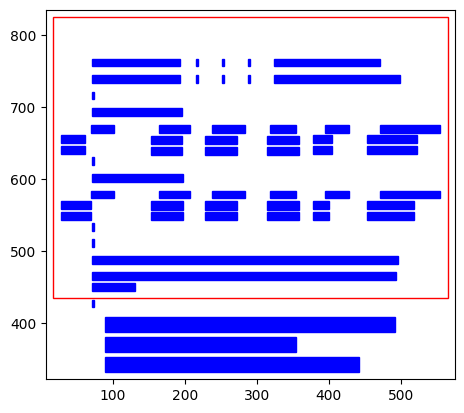

In [8]:
file_path = r'C:\Users\LinZha\Desktop\Text Mining\DigitalizedText_DataSource.pdf'
tables = camelot.read_pdf(file_path, flavor ='stream', edge_tol = 700)
camelot.plot(tables[0], kind = 'contour').show()

In [9]:
table1 = camelot.read_pdf(file_path, flavor = 'stream', table_areas = ['10,680,590,620'])
table2 = camelot.read_pdf(file_path, flavor = 'stream', table_areas = ['10,590,590,530'])

In [10]:
dataframe1 = table1[0].df


header = dataframe1.iloc[0]  # Set the first row as the header of the dataframe
dataframe1 = dataframe1[1:]  # Remove the first row from the dataframe
dataframe1.columns = header  # Set the header as the column names

# Reset the index of the dataframe
dataframe1.reset_index(drop=True, inplace=True)

dataframe1

,,Range,Nominal,As Found,As Left,Result,Tolerance Status
0,0 – 80V,,8.0000 V,7.9950 V,8.0840 V,PASS,Validated Pass
1,0 – 80V,,20.000 V,19.990 V,20.090 V,PASS,Validated Pass


In [11]:
dataframe2 = table2[0].df 


header = dataframe2.iloc[0]  # Set the first row as the header of the dataframe
dataframe2 = dataframe2[1:]  # Remove the first row from the dataframe
dataframe2.columns = header  # Set the header as the column names

# Reset the index of the dataframe
dataframe2.reset_index(drop=True, inplace=True)

dataframe2

,Range,Nominal,As Found,As Left,Result,Tolerance Status
0,0 - 60 A,6.0000 A,5.9906 A,5.9906 A,FAIL,Validated Fail
1,0 - 60 A,15.000 A,14.977 A,14.977 A,FAIL,Validated Fail


In [12]:
dataframe2['Supplier'] = suppliers
dataframe2['Serial Number'] = serial_number
dataframe2['Calibration Date'] = calibration_date
dataframe2['Calibration Expiration'] = calibration_expiration

dataframe2

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [3473441744.py:1]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [3473441744.py:2]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [3473441744.py:3]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Range,Nominal,As Found,As Left,Result,Tolerance Status,Supplier,Serial Number,Calibration Date,Calibration Expiration
0,0 - 60 A,6.0000 A,5.9906 A,5.9906 A,FAIL,Validated Fail,ABC Calibrator,12345678,"Feb. 22, 2023","Feb. 21, 2024"
1,0 - 60 A,15.000 A,14.977 A,14.977 A,FAIL,Validated Fail,ABC Calibrator,12345678,"Feb. 22, 2023","Feb. 21, 2024"


In [13]:
# Create a Pandas Excel writer using openpyxl as the engine
excel_path = r'C:\Users\LinZha\Desktop\Text Mining\Output.xlsx'
with pd.ExcelWriter(excel_path, engine='openpyxl') as excel_writer:
    # Write data to the Excel worksheet
    data = {
        'Suppliers': [suppliers],
        'Serial Number': [serial_number],
        'Calibration Date': [calibration_date],
        'Calibration Expiration': [calibration_expiration]
    }
    data_df = pd.DataFrame(data)
    data_df.to_excel(excel_writer, sheet_name='Data', index=False)

    # Append dataframe1 to the Excel worksheet
    dataframe1.to_excel(excel_writer, sheet_name='Data', startrow=data_df.shape[0] + 2, index=False, header=True)

    # Append dataframe2 to the Excel worksheet
    dataframe2.to_excel(excel_writer, sheet_name='Data', startrow=data_df.shape[0] + dataframe1.shape[0] + 4, index=False, header=True)

print(f'Data has been written to {excel_path}')


Data has been written to C:\Users\LinZha\Desktop\Text Mining\Output.xlsx


In [14]:
import mysql.connector
from mysql.connector import Error

In [15]:
def create_connection():
    connection = None
    try:
        connection = mysql.connector.connect(
            host='localhost',
            database='extraction',
            user='root',
            password='Summer1467'
        )
        if connection.is_connected():
            print('Connected to MySQL database')
    except Error as e:
        print(f'Error connecting to MySQL database: {e}')
    return connection


In [16]:
def clear_table_dataframe2(connection):
    try:
        cursor = connection.cursor()
        delete_query = "DELETE FROM dataframe2"
        cursor.execute(delete_query)
        connection.commit()
        print('Existing data cleared from dataframe2 table')
    except Error as e:
        print(f'Error clearing data from dataframe2 table: {e}')
        
def store_dataframe2(connection):
    try:
        cursor = connection.cursor()
        clear_table_dataframe2(connection) 
        for _, row in dataframe2.iterrows():
            insert_query = """
            INSERT INTO dataframe2 (Range_, Nominal, As_Found, As_left, Result, Tolerance_Status, Supplier, Serial_Number, Calibration_Date, Calibration_Expiration)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            """
            data = (
                row['Range'], row['Nominal'], row['As Found'], row['As Left'], row['Result'],
                row['Tolerance Status'], row['Supplier'], row['Serial Number'], row['Calibration Date'], row['Calibration Expiration']
            )
            cursor.execute(insert_query, data)
        connection.commit()
        print('dataframe2 data stored successfully')
    except Error as e:
        print(f'Error storing dataframe2: {e}')

In [17]:
connection = create_connection()
if connection:
    store_dataframe2(connection)
    connection.close()

Connected to MySQL database
Existing data cleared from dataframe2 table
dataframe2 data stored successfully
